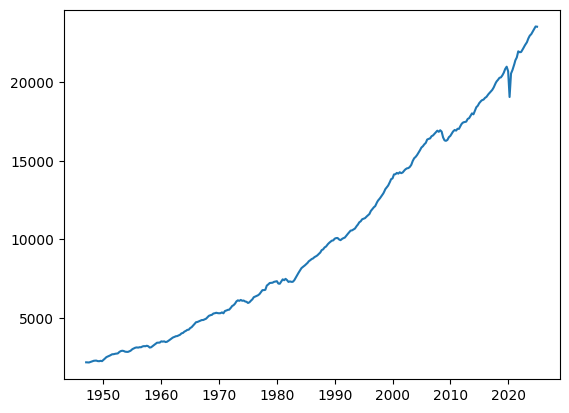

In [2]:
import pandas as pd
from fredapi import Fred
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import numpy as np

load_dotenv()

fred_api_key = os.getenv("FRED_API_KEY")
fred = Fred(api_key=fred_api_key)

real_gdp = fred.get_series("GDPC1").resample("MS").interpolate("linear")

plt.plot(real_gdp)
plt.show()

In [37]:
def get_recessions(start_date="1947-01-01") -> np.ndarray:
    usrec = fred.get_series("USREC")[start_date:]
    usrec = usrec.asfreq("MS")

    usrec_prev = usrec.shift(1)
    starts = usrec[(usrec == 1) & (usrec_prev == 0)].index
    ends = usrec[(usrec == 0) & (usrec_prev == 1)].index

    if len(ends) < len(starts):
        ends = ends.append(usrec.index[-1])

    return np.vstack([starts, ends]).T

recessions = get_recessions()

recessions

array([['1948-12-01T00:00:00.000000000', '1949-11-01T00:00:00.000000000'],
       ['1953-08-01T00:00:00.000000000', '1954-06-01T00:00:00.000000000'],
       ['1957-09-01T00:00:00.000000000', '1958-05-01T00:00:00.000000000'],
       ['1960-05-01T00:00:00.000000000', '1961-03-01T00:00:00.000000000'],
       ['1970-01-01T00:00:00.000000000', '1970-12-01T00:00:00.000000000'],
       ['1973-12-01T00:00:00.000000000', '1975-04-01T00:00:00.000000000'],
       ['1980-02-01T00:00:00.000000000', '1980-08-01T00:00:00.000000000'],
       ['1981-08-01T00:00:00.000000000', '1982-12-01T00:00:00.000000000'],
       ['1990-08-01T00:00:00.000000000', '1991-04-01T00:00:00.000000000'],
       ['2001-04-01T00:00:00.000000000', '2001-12-01T00:00:00.000000000'],
       ['2008-01-01T00:00:00.000000000', '2009-07-01T00:00:00.000000000'],
       ['2020-03-01T00:00:00.000000000', '2020-05-01T00:00:00.000000000']],
      dtype='datetime64[ns]')

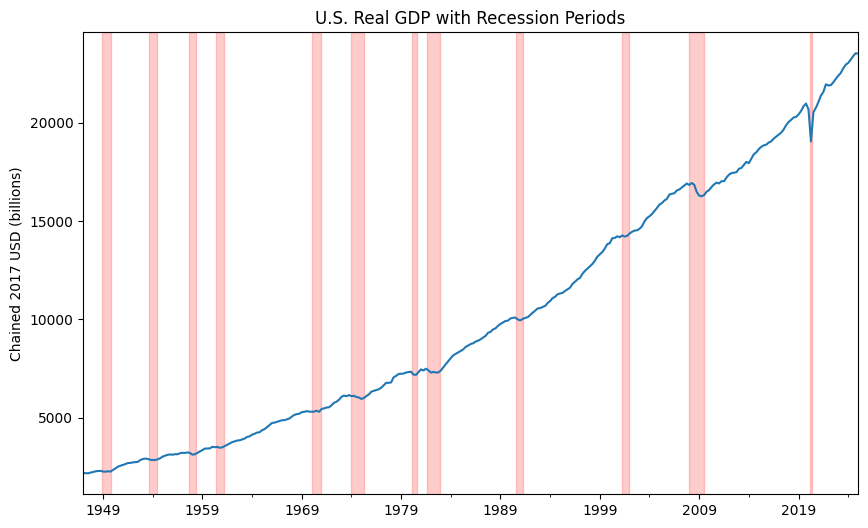

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
real_gdp.plot(ax=ax, label=None)

for start, end in recessions:
    ax.axvspan(start, end, color="red", alpha=0.2)

ax.set_title("U.S. Real GDP with Recession Periods")
ax.set_ylabel("Chained 2017 USD (billions)")
plt.show()

In [39]:
def get_targets(recessions, start_date="1947-01-01", n_months=3):
    month_offset = pd.DateOffset(months=n_months)
    end_date = pd.Timestamp.today().normalize() - month_offset
    months = pd.date_range(start=start_date, end=end_date, freq="MS")

    labels = []

    for start_month in months:
        end_month = start_month + month_offset
        rec_in_window = any(
            (start_month <= recession_start) and (recession_start <= end_month)
            for recession_start, _ in recessions
        )

        labels.append(int(rec_in_window))

    return pd.Series(labels, index=months, name=f"recession_within_{n_months}mo")

y = get_targets(recessions, n_months=3)

In [40]:
def get_all_features():
    features = {}

    features["Real GDP"] = fred.get_series("GDPC1").pct_change(1)[1:] * 100
    features["Unemployment Rate"] = fred.get_series("UNRATE").diff(1)[1:]
    features["Nonfarm Payrolls"] = fred.get_series("PAYEMS").pct_change(1)[1:] * 100
    features["Inflation"] = fred.get_series("CORESTICKM159SFRBATL")[1:]
    # features["Industrial Production Index"] = fre  

    return features

all_features = get_all_features()

In [ ]:
def get_data(
    selected_features: list[str], 
    all_features: dict,
    lags: int,
    window: int
):
    

1947-04-01 00:00:00
1948-02-01 00:00:00
1939-02-01 00:00:00
1968-01-01 00:00:00


In [ ]:
len(pd.date_range(start="1939-02-01", end="2025-01-01", freq="MS"))

1036